<a href="https://colab.research.google.com/github/shakib68/credit-card-capstone3/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#Data Loading and inspection

**Importing required Libraries **

In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import numpy as np
import xlrd


In [2]:
# Connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Dataset**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/capstone 4 new/Copy of default of credit card clients.csv")
df.shape

(30001, 25)

**Data Inspection**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

We have 25 columns and 30001 rows in this dataset

**Checking for null values**

In [5]:
#Null values
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

We can see that there is no value present in any of the column**

In [6]:
#Top 5 rows
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
df.shape

(30001, 25)

In [8]:
df.describe(include='all')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


#Feature Engineering

As our data is cleaned and having no null or infinity value so we will perform some feature Engineering for our ease.

**Making first row as column name for our ease**

In [9]:

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
#Changing the name of our target variable
df.rename(columns={"default payment next month": "default"}, inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Dropping column 'ID'**

In [12]:
#drop column "ID"
df.drop('ID', axis = 1, inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Coverting all columns datatype from str to int for further analysis**

In [13]:
#Converting datatype
df= df.astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [15]:
#Unique parameter in Education column
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

4-others,5-unknown ,0 and 6-unknown can be merged in single class 4

In [16]:
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])


In [17]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

Now we have only 4 category in column education 

**Same thing we do for column marriege and sex if found more number**

In [18]:
#unique number in sex column
df['SEX'].unique()

array([2, 1])

In SEX column only two groups are presented which is valid

In [19]:
#Unique number in column MARRIAGE
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

We can merge  0 in value 3-others which valid according to given data 

In [20]:

df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])


In [21]:
#unique value in marriage column
df['MARRIAGE'].unique()

array([1, 2, 3])

**We have done with the feature Engineering**

#Corelation Heatmap

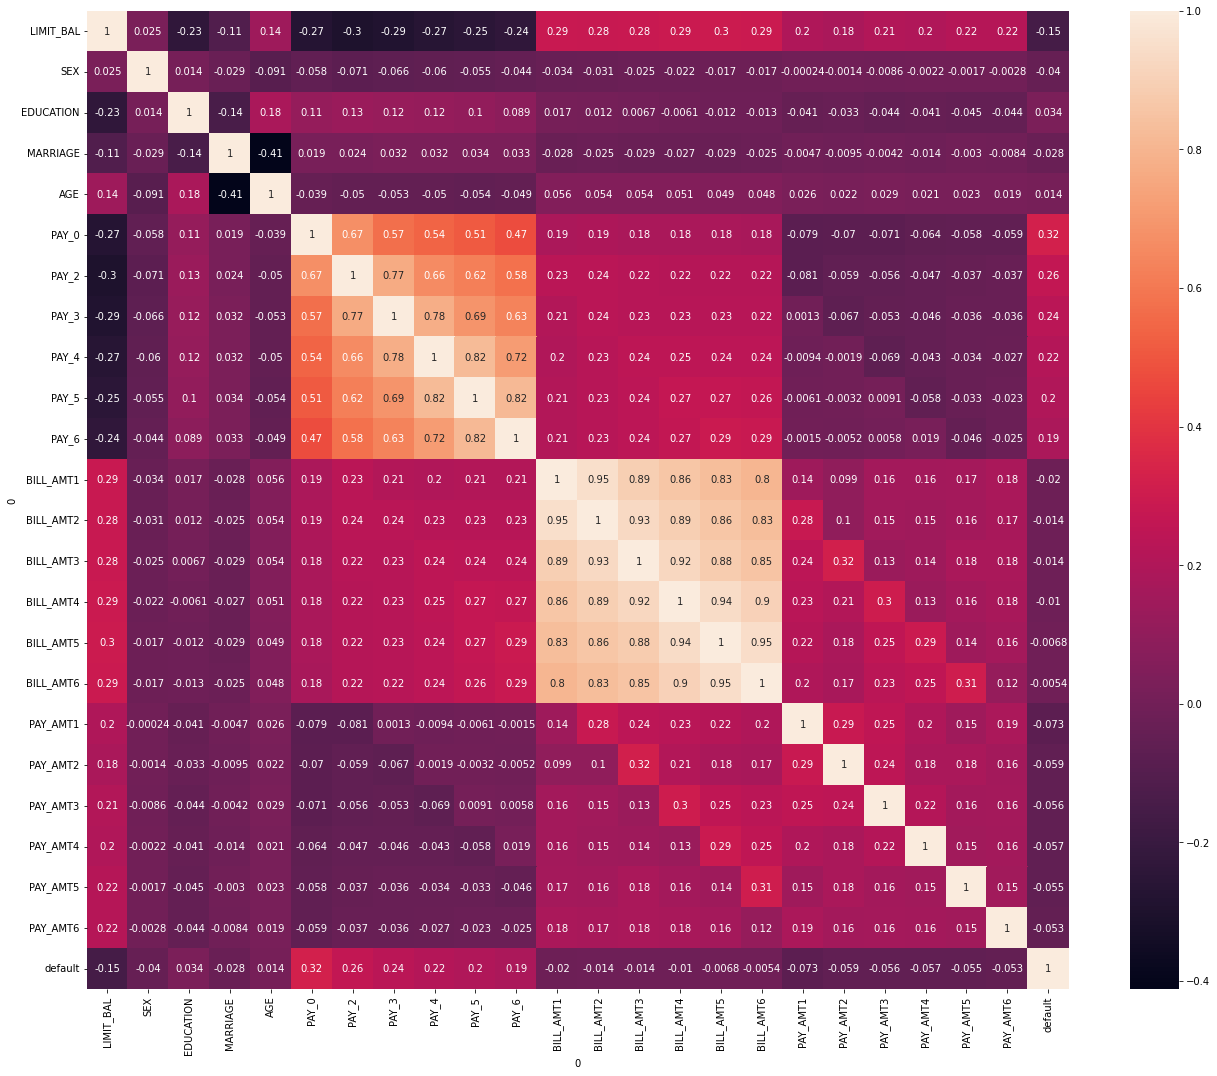

In [22]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

The only feature with a notable positive correlation with the dependent variable ‘Default’ is re-payment status during the last month (September). The highest negative correlation with default occurs with Limit_Balance, indicating that customers with lower limit balance are more likely to default. It can also be observed that some variables are highly correlated to each other, that is the case of the amount of bill statement and the repayment status in different months.

fitiing correlated and uncorrelated data via linear regression seperately.

Uncorrelated data are poentially more useful: discrimentory!


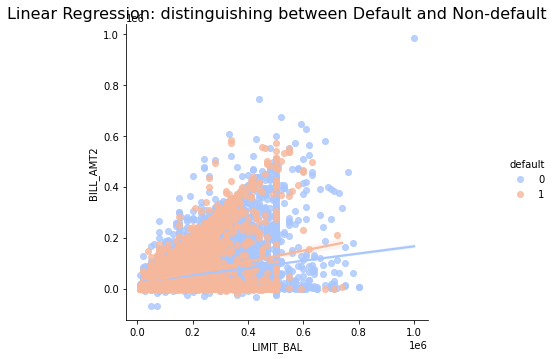

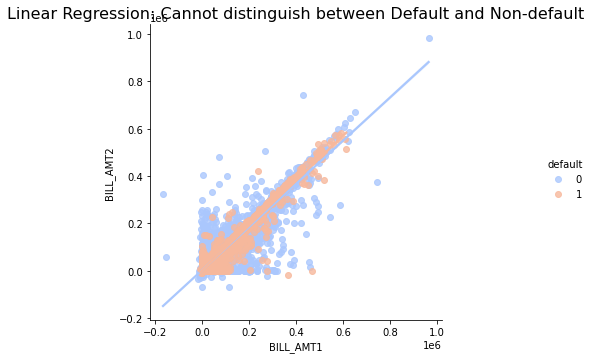

In [23]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = df, hue ='default', 
           palette='coolwarm')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=16)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = df, hue ='default', 
           palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

#Exploratory Data Analysis

**Basic information about mean ,standard deviation and 75% percentile**






In [137]:
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school (1) and university (2).

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2 years.

**Analysis for default or Non- default**

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


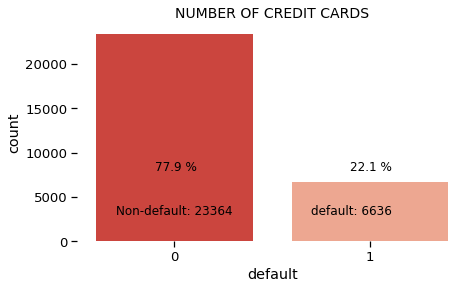

In [138]:
# The frequency of defaults
yes = int(df['default'].sum())
no = len(df) - int(yes)

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('default',data=df, palette="Reds_r")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('NUMBER OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

We can see that there are 6,636 default credit cards and 23364 non-default credit cards that is, the proportion of default in the data is 22,1% and 77.9% for non-default

([<matplotlib.patches.Wedge at 0x7f62b6d23610>,
 [Text(-0.8449152390547129, 0.704356613380692, 'Non-default'),
  Text(0.844915272028025, -0.7043565738273541, 'default ')],
 [Text(-0.460862857666207, 0.38419451638946833, '77.88%'),
  Text(0.4608628756516499, -0.38419449481492035, '22.12%')])

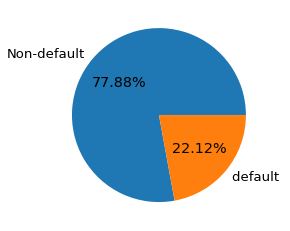

In [139]:
# Pie Plot of Target variable(Price range ) showing percentage of each catogory
count=df['default'].value_counts().values
classes = ['Non-default', 'default ']
plt.pie(count,labels=classes, autopct='%1.2f%%')

**Analysing credit card holder based on marital status**

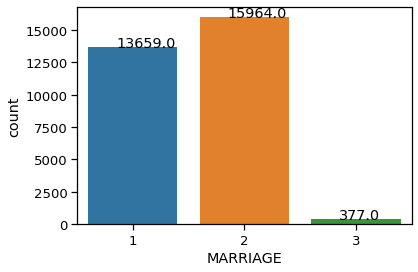

In [140]:
ax = sns.countplot(x="MARRIAGE", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

([<matplotlib.patches.Wedge at 0x7f62b6c56990>,
 [Text(-0.11085634294978461, 1.0943997766939648, 'married'),
  Text(0.06757503350437113, -1.097922408390904, 'single '),
  Text(1.0991428739418891, -0.04341592637229727, 'others ')],
 [Text(-0.060467096154427954, 0.5969453327421625, '53.21%'),
  Text(0.03685910918420243, -0.5988667682132204, '45.53%'),
  Text(0.5995324766955757, -0.02368141438488942, '1.26%')])

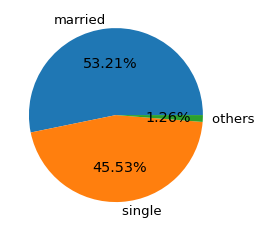

In [141]:
# Pie Plot of Marriage column
count=df['MARRIAGE'].value_counts().values
classes = ['married','single ', 'others ']
plt.pie(count,labels=classes, autopct='%1.2f%%')

It is claer from the above plot that more than half of credit card holder are single and very less are others like divorce or seperated.

**Analysing credit card holder based on Gender**

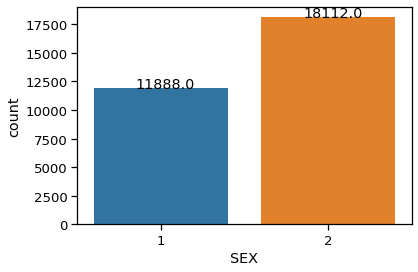

In [142]:
ax = sns.countplot(x="SEX", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

([<matplotlib.patches.Wedge at 0x7f62b6c07e10>,
 [Text(-0.3521651536748663, 1.042103499915991, 'FEMALE'),
  Text(0.35216525124363574, -1.0421034669439053, 'MALE ')],
 [Text(-0.1920900838226543, 0.5684200908632677, '60.37%'),
  Text(0.1920901370419831, -0.5684200728784937, '39.63%')])

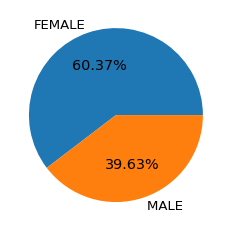

In [143]:
# Pie Plot of GENDER ANALYSIS
count=df['SEX'].value_counts().values
classes = ['FEMALE','MALE ']
plt.pie(count,labels=classes, autopct='%1.2f%%')

Female are more in number than male in using credit cards

**Analysing credit card holder based on Education**

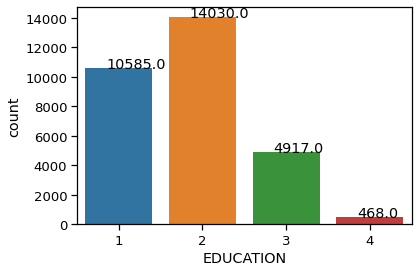

In [144]:
ax = sns.countplot(x="EDUCATION", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

([<matplotlib.patches.Wedge at 0x7f62b6b49150>,
 [Text(0.11154396432137892, 1.0943299063917933, 'university'),
  Text(-0.6791926781677836, -0.8652729661345452, 'graduate school '),
  Text(0.8997658888169212, -0.6327885470846449, 'high school '),
  Text(1.0986792338674503, -0.05388822754955427, 'other')],
 [Text(0.060842162357115766, 0.5969072216682508, '46.77%'),
  Text(-0.37046873354606374, -0.47196707243702457, '35.28%'),
  Text(0.4907813939001388, -0.34515738931889717, '16.39%'),
  Text(0.5992795821095183, -0.029393578663393233, '1.56%')])

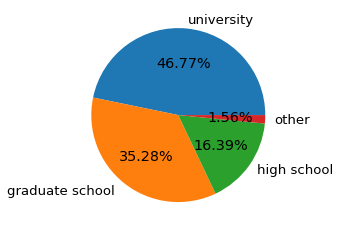

In [145]:
# Pie Plot of GENDER ANALYSIS
count=df['EDUCATION'].value_counts().values
classes = ['university','graduate school ','high school ','other']
plt.pie(count,labels=classes, autopct='%1.2f%%')

we can say that most the credit card holder are educated ,approx half of the credit card holder are educated at university level

**Analysing credit card holder based on AGE**

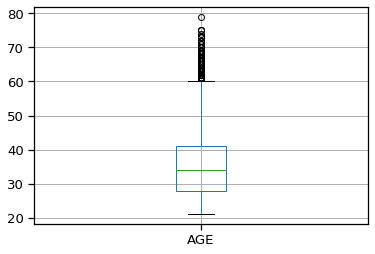

In [146]:
df.boxplot(column=['AGE'])  

Mostly the ceredit card holder are in the age group of 30 to 40 years

**Explanatory variables by defaulted and non-defaulted cards**

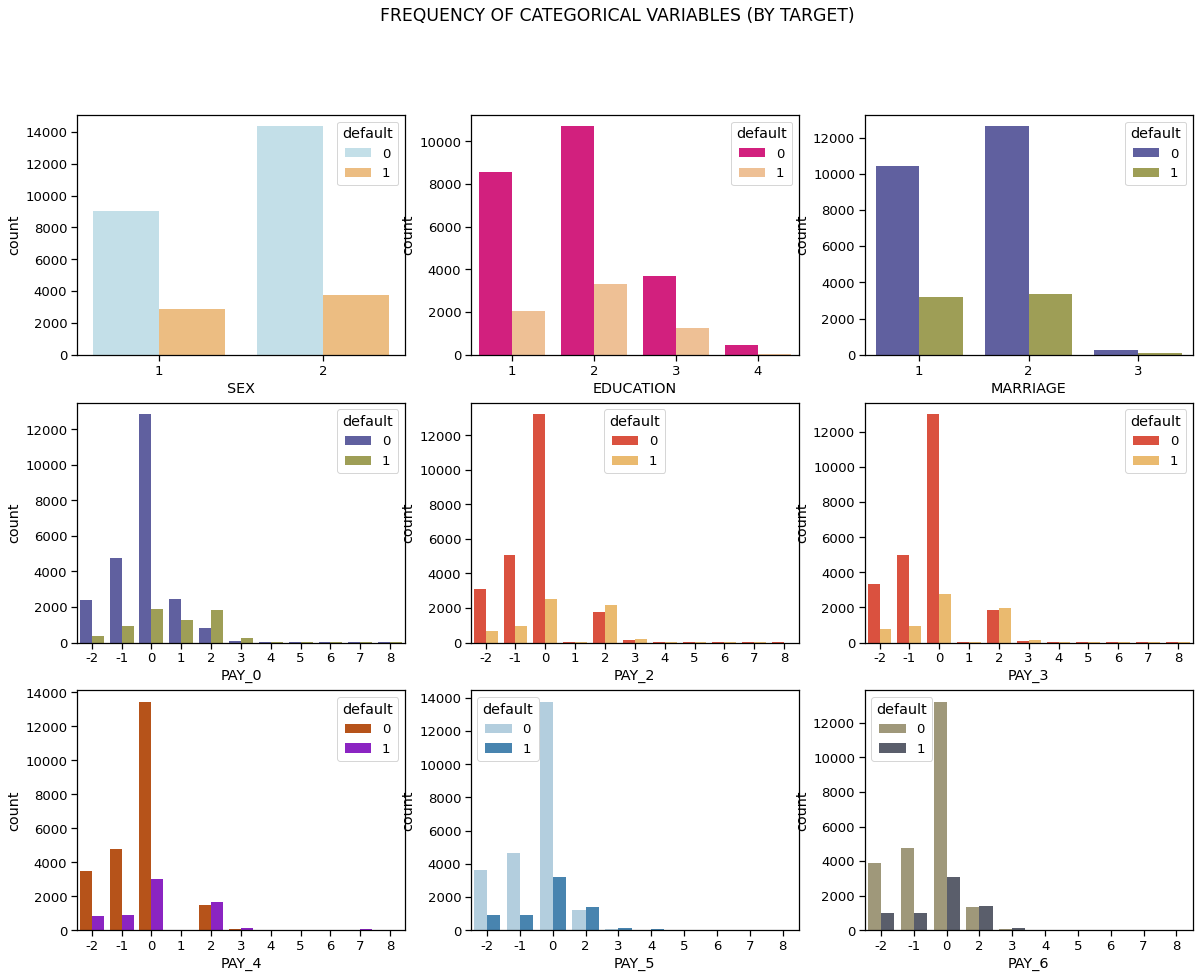

In [147]:
# Creating a new dataframe with categorical variables
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="RdYlBu_r", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="Accent_r",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="gist_stern",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default", data=subset, palette="gist_stern", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="YlOrRd_r", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="YlOrRd_r", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="gnuplot_r", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="cividis_r", ax=axes[2,2])

default--> 1

Non-default--> 0

**Analysis for credit card limit**

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


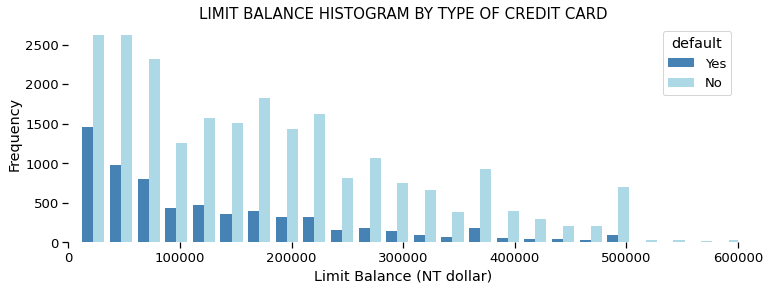

In [148]:
x1 = list(df[df['default'] == 1]['LIMIT_BAL'])
x2 = list(df[df['default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

You can see that for higher limit the default case are less

**Boxplot for analysing previous payment**

In [149]:
y=df['default']

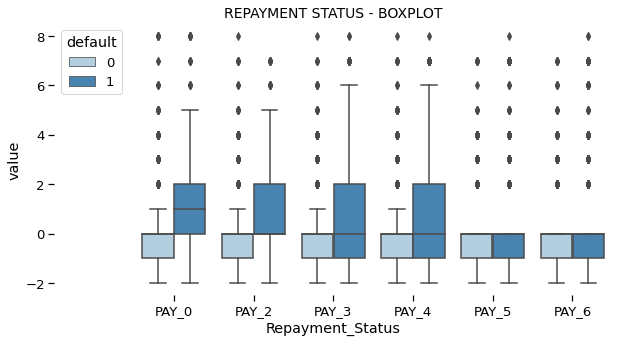

In [150]:
Repayment = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200)

 PAY_0 (Repayment status in September) and PAY_2 (Repayment status in August) have more discriminatory power the repayment status in other months.

#Splitting target and Independent variable into test and train dataset

In [24]:
# Input and output variables
y=df['default']
x=df.drop('default',axis=1)


In [25]:
from sklearn.model_selection import train_test_split
#Splitting the data into test and train dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)
x_train.columns
x_test.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object', name=0)

Standardization for scaling and better result

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

#Implementing Logistic regression ML algorithm for classification

In [37]:
#Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix

In [38]:
# Using multiclass logistic regression
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',fit_intercept=True, )
model.fit(x_train, y_train)
train_preds_proba = model.predict_proba(x_train)
test_preds_proba = model.predict_proba(x_test)
# Get the predicted classes
train_class_pred = model.predict(x_train)
test_class_pred = model.predict(x_test)


**Evaluating the performance of the trained model**

In [39]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

**Train and test accuracy of our model**

In [40]:
train_accuracy

0.8132941176470588

In [41]:
test_accuracy

0.8015555555555556

**model coefficient**

In [42]:
print(model.coef_)


[[-0.04617948 -0.02774185 -0.0381958  -0.04252182  0.03244577  0.33420959
   0.04618888  0.04131684  0.00345185  0.03191186  0.00115815 -0.22195481
   0.11387099  0.0112971   0.01600613  0.02744748  0.01335756 -0.11097485
  -0.13122388 -0.04738414 -0.01812702 -0.0381495  -0.02258297]]


**Confusion matrix**

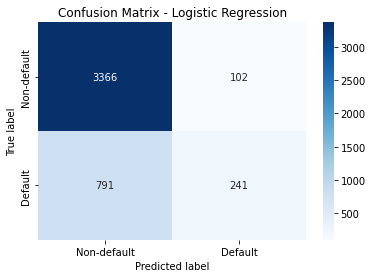

In [43]:
# Confusion Matrix
matrix=confusion_matrix(y_test,test_class_pred)
sns.heatmap(matrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");


**Cross Validation**

In [44]:
#precision recall etc
y_pred= model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3468
           1       0.70      0.23      0.35      1032

    accuracy                           0.80      4500
   macro avg       0.76      0.60      0.62      4500
weighted avg       0.79      0.80      0.76      4500



Here you can see that we achieved 81 % accuracy with logistic regression

#Implementing LightGBM Classifier model

In [45]:
# build the lightgbm model
import lightgbm as lgb
gbm = lgb.LGBMClassifier()
gbm.fit(x_train, y_train)

LGBMClassifier()

In [46]:
train = gbm.predict(x_train)
test = gbm.predict(x_test)

**Train and test data Accuracy**

In [47]:
accuracy_test_lgb =accuracy_score(test, y_test)
accuracy_test_lgb

0.8068888888888889

In [48]:
accuracy_train_lgb= accuracy_score(train, y_train)
accuracy_train_lgb

0.8429411764705882

**Confusion Matrix**

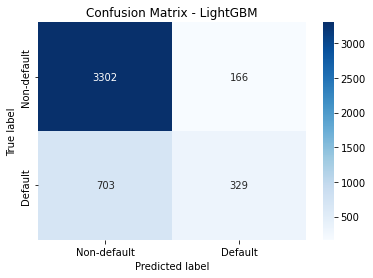

In [49]:
# Confusion Matrix
matrix=confusion_matrix(y_test,test)
sns.heatmap(matrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - LightGBM");


**Cross Validation**

In [50]:
#precision recall etc
print(classification_report(y_test, test))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3468
           1       0.66      0.32      0.43      1032

    accuracy                           0.81      4500
   macro avg       0.74      0.64      0.66      4500
weighted avg       0.79      0.81      0.78      4500



#Implementing Random Forest Classifier model

In [27]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.0 MB/s 


In [28]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[300,500],
          'max_depth':[10,20,],
          'min_samples_split':[2,6],
          'max_leaf_nodes':[None, 20, 40]
}

In [29]:
#Using the random forest classifier for the prediction
rf = RandomForestClassifier()
# Using Grid Search
rf = GridSearchCV(rf, params, scoring='accuracy', cv=5)
rf.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20],
                         'max_leaf_nodes': [None, 20, 40],
                         'min_samples_split': [2, 6],
                         'n_estimators': [300, 500]},
             scoring='accuracy')

**Best Estimator**

In [30]:
rf.best_estimator_

RandomForestClassifier(max_depth=20, max_leaf_nodes=40, min_samples_split=6,
                       n_estimators=300)

**Accuracy**

In [31]:
rf.best_score_

0.8073333333333335

**Confusion Matrix**

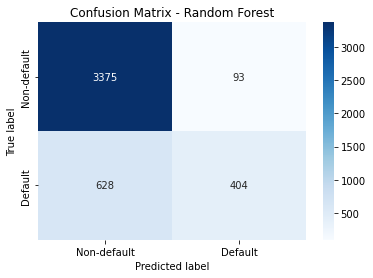

In [51]:
# Confusion Matrix
y_rf = rf.predict(x_test)
matrix=confusion_matrix(y_test,y_rf)
sns.heatmap(matrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");


**Cross Validation**

In [52]:
#precision recall etc
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3468
           1       0.81      0.39      0.53      1032

    accuracy                           0.84      4500
   macro avg       0.83      0.68      0.72      4500
weighted avg       0.84      0.84      0.82      4500



#Implementing Decision tree classification ML Algorithm

In [53]:
# Import Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

**Accuracy**

In [54]:
accuracydt=accuracy_score(y_test,pred)
print(accuracydt)


0.6953333333333334


**Confusion Matrix**

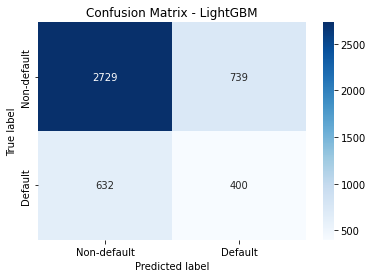

In [55]:
# Confusion Matrix
matrix=confusion_matrix(y_test,pred)
sns.heatmap(matrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - LightGBM");


**Cross Validation**

In [56]:
#precision recall etc
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3468
           1       0.35      0.39      0.37      1032

    accuracy                           0.70      4500
   macro avg       0.58      0.59      0.58      4500
weighted avg       0.71      0.70      0.70      4500



I**nterpretation or Justification of features**




In [57]:
from numpy.lib import shape_base
import shap
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(dt)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 
shap_values

[array([ 2.56554477e-01,  1.79099383e-03,  3.95982395e-04, -6.26194113e-03,
        -6.41374162e-03,  4.79748041e-02,  7.05805827e-03,  6.24328518e-03,
         1.26769643e-03,  3.32022561e-03, -7.96508723e-05,  4.20819643e-02,
         7.84290184e-03, -3.60855694e-02, -1.43965512e-02, -6.34682778e-02,
         4.05891465e-02,  1.79685199e-03, -1.00138039e-03,  2.47012184e-03,
        -5.99272487e-02, -3.32167447e-03, -8.66576771e-03]),
 array([-2.56554477e-01, -1.79099383e-03, -3.95982395e-04,  6.26194113e-03,
         6.41374162e-03, -4.79748041e-02, -7.05805827e-03, -6.24328518e-03,
        -1.26769643e-03, -3.32022561e-03,  7.96508723e-05, -4.20819643e-02,
        -7.84290184e-03,  3.60855694e-02,  1.43965512e-02,  6.34682778e-02,
        -4.05891465e-02, -1.79685199e-03,  1.00138039e-03, -2.47012184e-03,
         5.99272487e-02,  3.32167447e-03,  8.66576771e-03])]

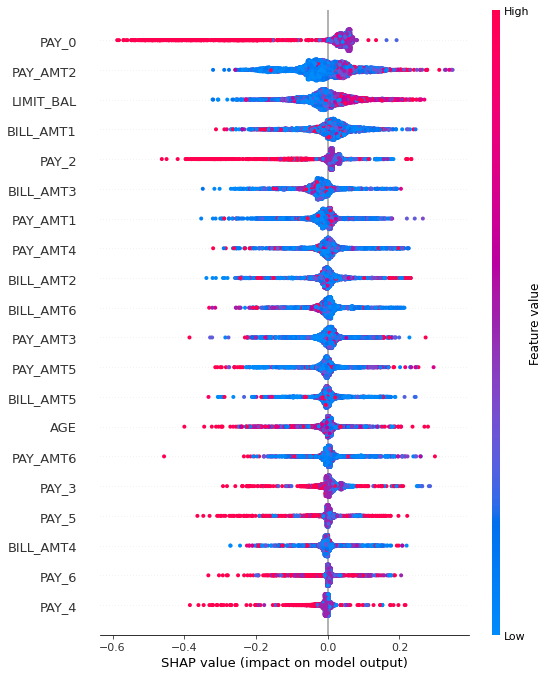

In [58]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(dt).shap_values(x_test)
shap.summary_plot(shap_values[0], x_test)


**Importance of features**

In [59]:
feature_importance = pd.DataFrame({'column':x.columns,
                                   'importance':dt.feature_importances_}).sort_values(by='importance', ascending=False)
feature_importance=feature_importance.reset_index(drop=True)
feature_importance

,column,importance
0,PAY_0,0.163671
1,AGE,0.076403
2,BILL_AMT1,0.064024
3,PAY_AMT2,0.058651
4,BILL_AMT6,0.056160
5,LIMIT_BAL,0.055678
6,PAY_AMT6,0.051178
7,BILL_AMT3,0.045765
8,PAY_AMT1,0.045111
9,BILL_AMT2,0.044380


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

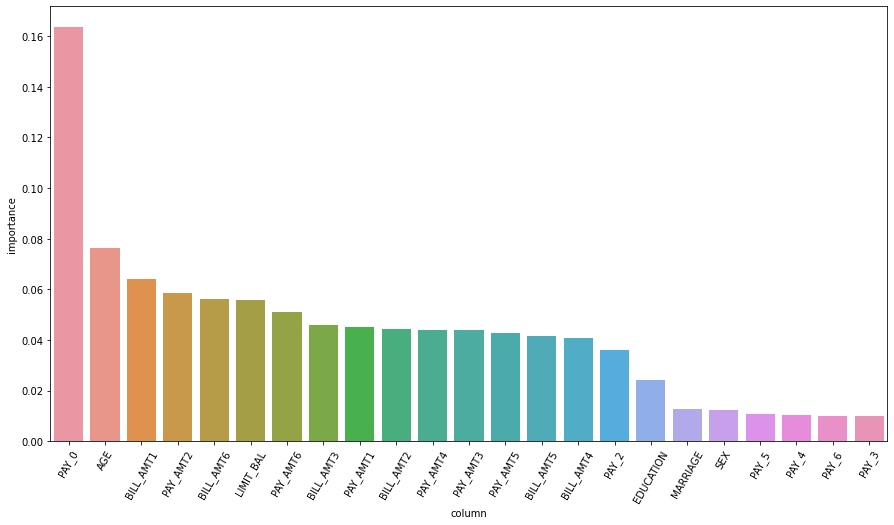

In [60]:
# Plot the feature importance of model
plt.figure(figsize=(15,8))
sns.barplot(x=feature_importance['column'],y=feature_importance['importance'])
plt.xticks(rotation=60)